In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [2]:
# Load the dataset
data = pd.read_csv('student_performance_data _.csv')

# Display the first few rows of the dataset
print(data.head())

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

In [3]:
# Prepare features and target variable
X = data[['Age', 'GPA', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']].values  # Include all features
y = data['GradeClass'].values

# Display feature and target shapes
print(X.shape, y.shape)


(2392, 10) (2392,)


In [4]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the classifier into the Training set
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  0  19   2   4   6]
 [  0  56   4   2   3]
 [  0   3  78   4   5]
 [  0   1  10  90  11]
 [  0   1   2   8 289]]


In [5]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        31
         1.0       0.70      0.86      0.77        65
         2.0       0.81      0.87      0.84        90
         3.0       0.83      0.80      0.82       112
         4.0       0.92      0.96      0.94       300

    accuracy                           0.86       598
   macro avg       0.65      0.70      0.67       598
weighted avg       0.82      0.86      0.84       598



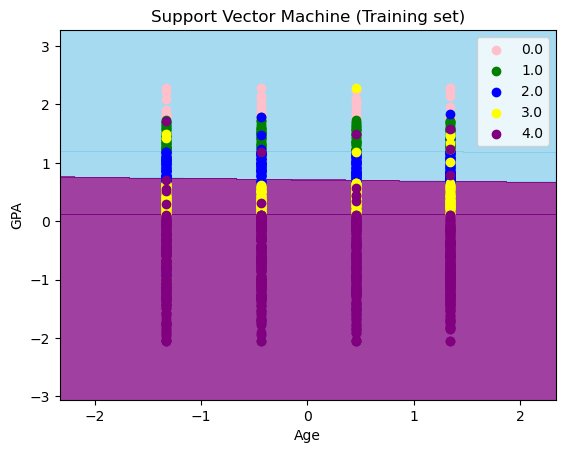

In [6]:
# Visualizing the Training set results
# Set training data
X_set, y_set = X_train, y_train

# Create meshgrid for the contour plot using the first two features (X1, X2) for visualization
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Prepare the meshgrid data by including the remaining features (set to some default values)
# We are using the first two features (X1, X2) for visualization, but the model expects all 10 features.
Z = np.array([np.column_stack([X1.ravel(), X2.ravel()] + [np.zeros(X1.ravel().shape)]*8)])  # Adding 8 zeros to match the other features

# Reshape Z to match the number of points in the meshgrid (X1 and X2)
Z = Z.reshape(-1, 10)

# Predict the classes for each point in the meshgrid
Z = classifier.predict(Z)

# Create the contour plot
plt.contourf(X1, X2, Z.reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('skyblue', 'purple')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Define a color map with as many colors as there are unique classes in 'y_set'
colors = ListedColormap(['pink', 'green', 'blue', 'yellow', 'purple'])

# Plotting the training points with distinct colors for each class
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=colors(i), label=j)

# Add titles and labels
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')  # Replace with actual feature name
plt.ylabel('GPA')  # Replace with actual feature name
plt.legend()
plt.show()

In [7]:
# Function to predict grade class based on user input
def predict_grade_class(input_data, model, scaler, feature_columns):
    """
    Predicts the GradeClass for a new student based on input features.

    Args:
    - input_data: List containing feature values for the student.
    - model: Trained SVM model.
    - scaler: Fitted StandardScaler for feature standardization.
    - feature_columns: List of feature column names.

    Returns:
    - Predicted GradeClass for the student.
    """
    # Convert input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=feature_columns)
    # Standardize input features
    input_scaled = scaler.transform(input_df)
    # Predict GradeClass using the trained model
    predicted_class = model.predict(input_scaled)
    return predicted_class[0]


In [8]:
# Function to get user input for all features
def get_user_input(feature_columns):
    """
    Prompts the user to enter feature values for a new student.
    
    Returns:
    - List of feature values in the correct order.
    """
    print("\nEnter the following details for the student:")
    user_input = []
    for feature in feature_columns:
        while True:
            try:
                if feature in ['Age', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA']:
                    value = input(f"Enter value for '{feature}': ")
                    user_input.append(float(value))  # Convert input to float for numerical features
                elif feature in ['Gender', 'Ethnicity', 'ParentalEducation']:  # Handle categorical features as strings
                    value = input(f"Enter value for '{feature}' (e.g., Male, Female, etc.): ")
                    user_input.append(str(value))  # Keep them as strings
                break
            except ValueError:
                print("Invalid input. Please enter a valid value.")
    return user_input

In [ ]:
# Main Program
if __name__ == "__main__":
    # List of feature columns (make sure they match the columns in your dataset)
    feature_columns = ['Age', 'GPA', 'StudyTimeWeekly', 'Absences', 'Tutoring', 
                       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
    
    # Prompt user for input
    user_input = get_user_input(feature_columns)
    
    # Predict GradeClass for user input
    predicted_grade = predict_grade_class(user_input, classifier, scaler, feature_columns)
    
    # Map predicted GradeClass to readable grades
    grade_mapping = {
        0: 'A (GPA >= 3.5)',
        1: 'B (3.0 <= GPA < 3.5)',
        2: 'C (2.5 <= GPA < 3.0)',
        3: 'D (2.0 <= GPA < 2.5)',
        4: 'F (GPA < 2.0)'
    }
    print(f"\nThe predicted GradeClass for the student is: {grade_mapping[predicted_grade]}")


Enter the following details for the student:
